# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets, linear_model

df = pd.read_csv('human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

In [30]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


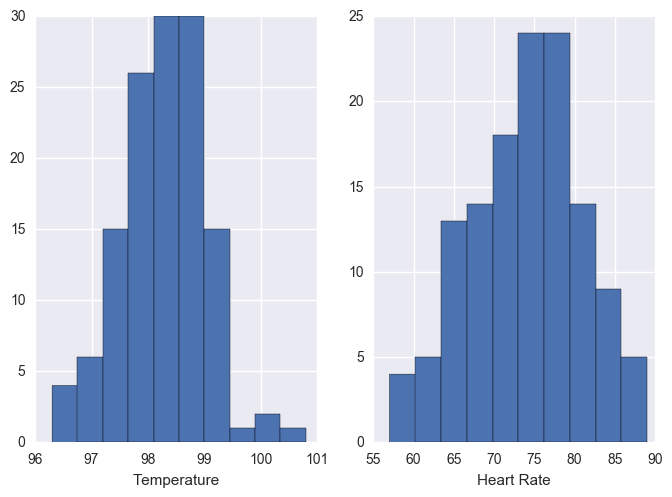

In [31]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax1.hist(df.temperature)
ax1.set_xlabel('Temperature')
ax2.hist(df.heart_rate)
ax2.set_xlabel('Heart Rate')
plt.show()

In [34]:
norm_temp = stats.mstats.normaltest(df.temperature, axis=0)
p_temp = str(norm_temp[1])
print('Body temperature is normally distributed')
print('p = ' + p_temp)

norm_hr = stats.mstats.normaltest(df.heart_rate, axis=0)
p_hr = str(norm_hr[1])
print('Heart rate is normally distributed')
print('p = ' + p_hr)

Body temperature is normally distributed
p = 0.258747986349
Heart rate is normally distributed
p = 0.308989787248


## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [19]:
print('The total sample size is '+  str(df.shape[0]))

The total sample size is 130


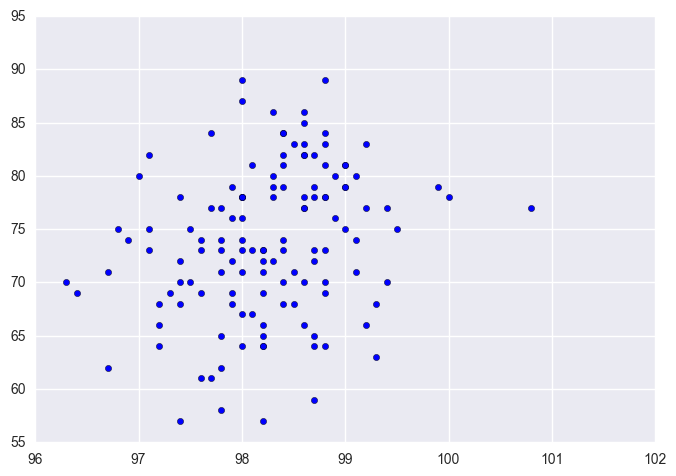

In [20]:
plt.scatter(df.temperature, df.heart_rate)
plt.show()

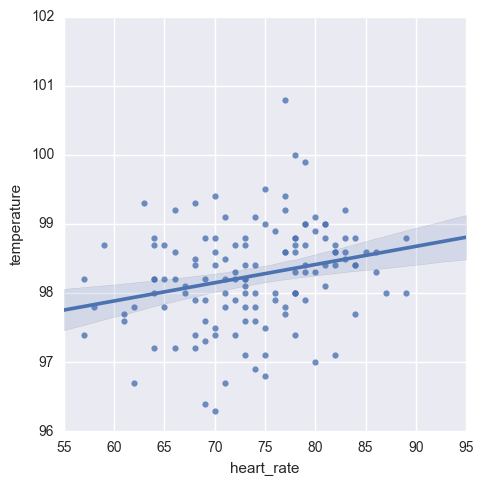

In [21]:
sns.lmplot(y='temperature', x='heart_rate', data=df)  
plt.show()

In [35]:
r2 = stats.pearsonr(df.temperature, df.heart_rate)
p_co = str(r2[0])
p_pval = str(r2[1])
print('The Pearson’s correlation coefficient is ' + p_co)
print('The p-valueis ' + p_pval)

The Pearson’s correlation coefficient is 0.253656402721
The p-valueis 0.00359148925071


## 3. Is the true population mean really 98.6 degrees F?

In [36]:
temp_mean = df.temperature.mean()
print('The mean body temperature from this sample is ' + str(temp_mean))

The mean body temperature from this sample is 98.2492307692


Would you use a one-sample or two-sample test? Why?
* Yes. The mean true mean could be above or below 98.6C

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [37]:
std_temp = df.temperature.std()
std_temp
abn_neg, abn_post = str(temp_mean + 2*std_temp), str(temp_mean - 2*std_temp)
print('Body temp above ' + abn_neg  +' or below ' + abn_post + 'could be considered abnormal')

Body temp above 99.7155970853 or below 96.7828644532could be considered abnormal


## 5. Is there a significant difference between males and females in normal temperature?

In [38]:
temp_m = df[df['gender'] == 'M']
temp_f = df[df['gender'] == 'F']
print(temp_m.shape)
print(temp_f.shape)

(65, 3)
(65, 3)


In [40]:
ttest_gender = stats.ttest_ind(temp_m.temperature, temp_f.temperature)

print('There is a significant difference for temp by gender, p=' + str(ttest_gender[1]))

There is a significant difference for temp by gender, p=0.0239318831224


Write a story with your conclusion in the context of the original problem

## Introduction
The contention that the human core body temperture is a held at steady 98.6F has been a seemingly invioliable medical fact since Carl Wunderlich first published his seminal book "The behavior of the self-warmth in diseases" nearly 120 years. However, several recent publications have called this measure into questions, with some reports indicating sex differences in core body temperature. [see Young, Hutchens et al. 2008a, 2008b]. To address ambiguity, this study employed a novel medical imaging technology that allows for non-invasive  deep tissue termal detection (NTD). This study recruited 65 healthy male and 65 healthy female students enrolled at the University of Michigan to assess sex differences in core body tempeture. 

## Results

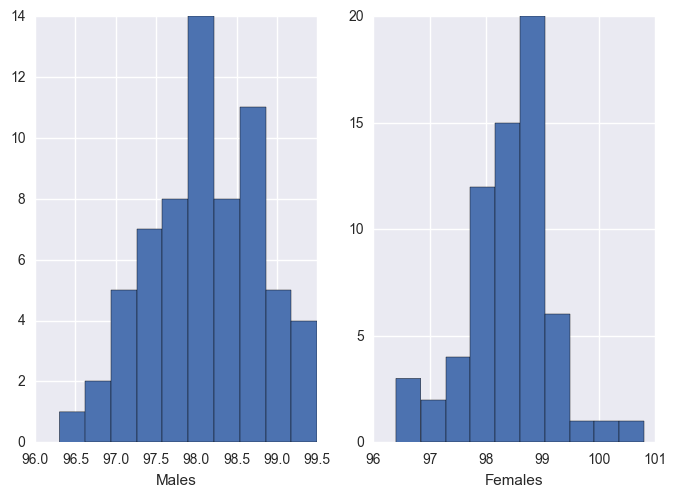

In [41]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax1.hist(temp_m.temperature)
ax1.set_xlabel('Males')
ax2.hist(temp_f.temperature)
ax2.set_xlabel('Females')
plt.show()

In [42]:
m = temp_m.temperature.mean()
f = temp_f.temperature.mean()

ttest_gender = stats.ttest_ind(temp_m.temperature, temp_f.temperature)

print('Mean male temperature was ' + str(m) +'.' + ' The mean female body temperature was '+ str(f))
print('Sex specific differences in core body temperatre were statistically significant. (p=' + str(ttest_gender[1]) + ' Student\'s two-way t-test).')

Mean male temperature was 98.1046153846. The mean female body temperature was 98.3938461538
Sex specific differences in core body temperatre were statistically significant. (p=0.0239318831224 Student's two-way t-test).
